# A Pandas modul

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataframe-ek

A `pandas` egy olyan eszkoz, amely kombinalni tudja a `numpy` effektivitasat, az Excel tablazatokbol megszokott logikat, biztosit nehany egyszerubb adatbazis-kezelesi funkciot, es attekinthetove teszi a beolvasott adatot.

Altalanossagban a kovetkezo logikai muveleteket szeretnenk majd az adattablak sorain / oszlopain elvegezni:
* map (lekepezes, pl. az oszlop minden elemehez hozzaadunk egy szamot)
* filter (sorok reszhalmazanak elerese logikai szures segitsegevel, l. numpy maszkolas)
* reduce (a sorok csoportositasa, majd csoportonkenti aggregacios muveletek, pl. atlagkepzes elvegzese)
* join (ket adattabla osszefuzese)

### `Dataframe` létrehozása

Létre tudunk hozni `DataFrame`-et szótárból az alábbi módokon:

In [11]:
df = pd.DataFrame({"Nem" : ["fiú", "fiú", "lány", "fiú", "lány"],
                   "Név" : ["Andris", "Barni", "Cili", "Dani", "Eszti"],
                   "Kor" : [17, 20, 19, 17, 18],
                   "Kedvenc szín" : ["Zöld", "Kék", "Zöld", "Sárga", "Piros"]},
                  index=["α", "β", "γ", "δ", "e"])
df

,Nem,Név,Kor,Kedvenc szín
α,fiú,Andris,17,Zöld
β,fiú,Barni,20,Kék
γ,lány,Cili,19,Zöld
δ,fiú,Dani,17,Sárga
e,lány,Eszti,18,Piros


In [12]:
df['Nem']

α     fiú
β     fiú
γ    lány
δ     fiú
e    lány
Name: Nem, dtype: object

In [13]:
df.index

Index(['α', 'β', 'γ', 'δ', 'e'], dtype='object')

In [14]:
df = pd.DataFrame({"Nem" : ["fiú", "fiú", "lány", "fiú", "lány"],
                   "Név" : ["Andris", "Barni", "Cili", "Dani", "Eszti"],
                   "Kor" : [17, 20, 19, 17, 18],
                   "Kedvenc szín" : ["Zöld", "Kék", "Zöld", "Sárga", "Piros"]})

In [15]:
df

,Nem,Név,Kor,Kedvenc szín
0,fiú,Andris,17,Zöld
1,fiú,Barni,20,Kék
2,lány,Cili,19,Zöld
3,fiú,Dani,17,Sárga
4,lány,Eszti,18,Piros


In [16]:
df.index

RangeIndex(start=0, stop=5, step=1)

In [17]:
df.set_index("Név", inplace=True)

In [18]:
df

,Nem,Kor,Kedvenc szín
Név,,,
Andris,fiú,17,Zöld
Barni,fiú,20,Kék
Cili,lány,19,Zöld
Dani,fiú,17,Sárga
Eszti,lány,18,Piros


In [ ]:
df.index

In [19]:
df['Nem']

Név
Andris     fiú
Barni      fiú
Cili      lány
Dani       fiú
Eszti     lány
Name: Nem, dtype: object

Vagy listák listájából (soronként):

In [20]:
row1 = ["fiú", "Adnris", 17, "Zöld"]
row2 = ["fiú", "Barni", 20, "Kék"]

cols = ["Nem", "Név", "Kor", "Kedvenc szín"]
idx = ["α", "β"]

df2 = pd.DataFrame([row1, row2], columns=cols, index=idx)
df2

,Nem,Név,Kor,Kedvenc szín
α,fiú,Adnris,17,Zöld
β,fiú,Barni,20,Kék


### `DataFrame`-ben tárolt adatok elérése

#### Adattípusok lekérdezése

In [21]:
df.dtypes

Nem             object
Kor              int64
Kedvenc szín    object
dtype: object

#### Oszlopnevek lekérdezése

In [22]:
df.columns

Index(['Nem', 'Kor', 'Kedvenc szín'], dtype='object')

#### Oszlopok lekérdezése

In [23]:
df["Nem"]

Név
Andris     fiú
Barni      fiú
Cili      lány
Dani       fiú
Eszti     lány
Name: Nem, dtype: object

In [24]:
df[["Nem", "Kedvenc szín"]]

,Nem,Kedvenc szín
Név,,
Andris,fiú,Zöld
Barni,fiú,Kék
Cili,lány,Zöld
Dani,fiú,Sárga
Eszti,lány,Piros


#### Sornevek (`index`) lekérdezése

In [25]:
df.index

Index(['Andris', 'Barni', 'Cili', 'Dani', 'Eszti'], dtype='object', name='Név')

#### Sorok lekérdezése

In [26]:
df.loc["Andris"]

Nem              fiú
Kor               17
Kedvenc szín    Zöld
Name: Andris, dtype: object

In [27]:
df.loc[["Andris", "Eszti"]]

,Nem,Kor,Kedvenc szín
Név,,,
Andris,fiú,17,Zöld
Eszti,lány,18,Piros


#### Sorok és oszlopok lekérdezése

In [28]:
df.loc[["Andris", "Eszti"]][["Nem", "Kedvenc szín"]]

,Nem,Kedvenc szín
Név,,
Andris,fiú,Zöld
Eszti,lány,Piros


### Sorok/oszlopok hozzáadása

#### Oszlop hozzáadása

In [29]:
df["Vércsoport"] = ["A", "B", "A", "A", "B"]
df

,Nem,Kor,Kedvenc szín,Vércsoport
Név,,,,
Andris,fiú,17,Zöld,A
Barni,fiú,20,Kék,B
Cili,lány,19,Zöld,A
Dani,fiú,17,Sárga,A
Eszti,lány,18,Piros,B


#### Sor hozzáadása

In [30]:
df.loc["Frida"] = ["lány", 20, None, "B"]
df.loc["Janka"] = ["lány", 18, "Rózsaszín", "A"]
df

,Nem,Kor,Kedvenc szín,Vércsoport
Név,,,,
Andris,fiú,17,Zöld,A
Barni,fiú,20,Kék,B
Cili,lány,19,Zöld,A
Dani,fiú,17,Sárga,A
Eszti,lány,18,Piros,B
Frida,lány,20,None,B
Janka,lány,18,Rózsaszín,A


### Adat módosítása

In [31]:
df.at["Frida", "Kedvenc szín"] = "Lila"
df

,Nem,Kor,Kedvenc szín,Vércsoport
Név,,,,
Andris,fiú,17,Zöld,A
Barni,fiú,20,Kék,B
Cili,lány,19,Zöld,A
Dani,fiú,17,Sárga,A
Eszti,lány,18,Piros,B
Frida,lány,20,Lila,B
Janka,lány,18,Rózsaszín,A


### Törlés

#### Oszlop törlése

In [32]:
df2=df.drop("Kedvenc szín", axis=1)
#df.drop("Kedvenc szín", axis=1, inplace=True)

,Nem,Kor,Vércsoport
Név,,,
Andris,fiú,17,A
Barni,fiú,20,B
Cili,lány,19,A
Dani,fiú,17,A
Eszti,lány,18,B
Frida,lány,20,B
Janka,lány,18,A


In [33]:
df

,Nem,Kor,Kedvenc szín,Vércsoport
Név,,,,
Andris,fiú,17,Zöld,A
Barni,fiú,20,Kék,B
Cili,lány,19,Zöld,A
Dani,fiú,17,Sárga,A
Eszti,lány,18,Piros,B
Frida,lány,20,Lila,B
Janka,lány,18,Rózsaszín,A


#### Sor törlése

In [34]:
df.drop("Frida")

,Nem,Kor,Kedvenc szín,Vércsoport
Név,,,,
Andris,fiú,17,Zöld,A
Barni,fiú,20,Kék,B
Cili,lány,19,Zöld,A
Dani,fiú,17,Sárga,A
Eszti,lány,18,Piros,B
Janka,lány,18,Rózsaszín,A


### Egyszerű műveletek

In [35]:
df["Pontszám 1"] = np.random.randint(1, 10, df.shape[0])
df["Pontszám 2"] = np.random.randint(1, 10, df.shape[0])

df["Pontszám 1"] + df["Pontszám 2"]

Név
Andris    12
Barni     15
Cili      11
Dani       8
Eszti     13
Frida      3
Janka      6
dtype: int64

In [36]:
df["Összpontszám"] = df["Pontszám 1"] + df["Pontszám 2"]
df["Átlag"] = (df["Pontszám 1"] + df["Pontszám 2"])/2
df

,Nem,Kor,Kedvenc szín,Vércsoport,Pontszám 1,Pontszám 2,Összpontszám,Átlag
Név,,,,,,,,
Andris,fiú,17,Zöld,A,3,9,12,6.0
Barni,fiú,20,Kék,B,7,8,15,7.5
Cili,lány,19,Zöld,A,3,8,11,5.5
Dani,fiú,17,Sárga,A,5,3,8,4.0
Eszti,lány,18,Piros,B,6,7,13,6.5
Frida,lány,20,Lila,B,1,2,3,1.5
Janka,lány,18,Rózsaszín,A,3,3,6,3.0


In [37]:
df["Kor"] += 1
df

,Nem,Kor,Kedvenc szín,Vércsoport,Pontszám 1,Pontszám 2,Összpontszám,Átlag
Név,,,,,,,,
Andris,fiú,18,Zöld,A,3,9,12,6.0
Barni,fiú,21,Kék,B,7,8,15,7.5
Cili,lány,20,Zöld,A,3,8,11,5.5
Dani,fiú,18,Sárga,A,5,3,8,4.0
Eszti,lány,19,Piros,B,6,7,13,6.5
Frida,lány,21,Lila,B,1,2,3,1.5
Janka,lány,19,Rózsaszín,A,3,3,6,3.0


In [38]:
df.at["Andris", "Pontszám 1"] += 1
df

,Nem,Kor,Kedvenc szín,Vércsoport,Pontszám 1,Pontszám 2,Összpontszám,Átlag
Név,,,,,,,,
Andris,fiú,18,Zöld,A,4,9,12,6.0
Barni,fiú,21,Kék,B,7,8,15,7.5
Cili,lány,20,Zöld,A,3,8,11,5.5
Dani,fiú,18,Sárga,A,5,3,8,4.0
Eszti,lány,19,Piros,B,6,7,13,6.5
Frida,lány,21,Lila,B,1,2,3,1.5
Janka,lány,19,Rózsaszín,A,3,3,6,3.0


### Oszlopmuveletek (soronkenti for ciklus helyett!!!)

A legegyszerubb numerikus muveleteket, ahogy lattuk, ertelmezhetjuk oszlopokra, a visszateresi ertek is egy `Series` osztalyu oszlop lesz.

In [39]:
type(df['Kor']+1)

pandas.core.series.Series

Gyakran azonban valamilyen bonyolultabb fuggvenyt, esetleg sajat fuggvenyt szeretnenk alkalmazni egy oszlopra. Peldaul egy uj oszlopba taroljuk el a nevek kezdobetujet, erre hasznalhatjuk a `Series` osztaly `map` metodusat.

In [40]:
df['Kezdobetu'] = df.index.map(lambda s: s[0])

In [41]:
df

,Nem,Kor,Kedvenc szín,Vércsoport,Pontszám 1,Pontszám 2,Összpontszám,Átlag,Kezdobetu
Név,,,,,,,,,
Andris,fiú,18,Zöld,A,4,9,12,6.0,A
Barni,fiú,21,Kék,B,7,8,15,7.5,B
Cili,lány,20,Zöld,A,3,8,11,5.5,C
Dani,fiú,18,Sárga,A,5,3,8,4.0,D
Eszti,lány,19,Piros,B,6,7,13,6.5,E
Frida,lány,21,Lila,B,1,2,3,1.5,F
Janka,lány,19,Rózsaszín,A,3,3,6,3.0,J


Igy is megtehettem volna a fenti muveletet:

In [42]:
def kezdobetu(s):
    return s[0]

In [43]:
df.index.map(kezdobetu)

Index(['A', 'B', 'C', 'D', 'E', 'F', 'J'], dtype='object', name='Név')

Ha esetleg tobb oszlop erteket is fel szeretnenk hasznalni egy fuggvenyben, akkor pedig a `DataFrame` `apply` metodusat hasznalhatjuk. Peldaul fuzzuk az elobb kapott kezdobetuket zarojelben a szuletesi ev moge (felteve hogy 2022-t irunk)!

In [44]:
df.drop("Frida", axis=0, inplace=True)

In [45]:
df.apply(lambda row: row['Kezdobetu'] + ' - ' + str(int(2022 - row["Kor"])), axis=1) # soronkent fut, axis=0 lenne oszloponkent

Név
Andris    A - 2004
Barni     B - 2001
Cili      C - 2002
Dani      D - 2004
Eszti     E - 2003
Janka     J - 2003
dtype: object

**Az `apply` latvanyos, de lassu, a `map` nagyon gyors.**

### Adatok aggregálása

#### Megszámlálás

In [46]:
df.count()

Nem             6
Kor             6
Kedvenc szín    6
Vércsoport      6
Pontszám 1      6
Pontszám 2      6
Összpontszám    6
Átlag           6
Kezdobetu       6
dtype: int64

In [47]:
df["Nem"].count()

6

In [48]:
df.count(axis=1)

Név
Andris    9
Barni     9
Cili      9
Dani      9
Eszti     9
Janka     9
dtype: int64

In [49]:
df.loc["Andris"].count()

9

In [50]:
df['Vércsoport'].value_counts()

A    4
B    2
Name: Vércsoport, dtype: int64

#### Összegzés/Átlagolás

In [51]:
print("Összesen elért pontszám:", df['Összpontszám'].sum(),\
      ", átlagosan elért pontszám:",  df['Összpontszám'].mean())

Összesen elért pontszám: 65 , átlagosan elért pontszám: 10.833333333333334


In [52]:
df[["Pontszám 1", "Pontszám 2"]].sum(axis=0)

Pontszám 1    28
Pontszám 2    38
dtype: int64

In [53]:
df[["Pontszám 1", "Pontszám 2"]].sum(axis=1)

Név
Andris    13
Barni     15
Cili      11
Dani       8
Eszti     13
Janka      6
dtype: int64

### Bool indexelés/Maszkolás

In [54]:
df["Nem"] == "lány"

Név
Andris    False
Barni     False
Cili       True
Dani      False
Eszti      True
Janka      True
Name: Nem, dtype: bool

In [55]:
df["Összpontszám"] >= df["Összpontszám"].mean()

Név
Andris     True
Barni      True
Cili       True
Dani      False
Eszti      True
Janka     False
Name: Összpontszám, dtype: bool

In [56]:
df[df["Összpontszám"] >= df["Összpontszám"].mean()]

,Nem,Kor,Kedvenc szín,Vércsoport,Pontszám 1,Pontszám 2,Összpontszám,Átlag,Kezdobetu
Név,,,,,,,,,
Andris,fiú,18,Zöld,A,4,9,12,6.0,A
Barni,fiú,21,Kék,B,7,8,15,7.5,B
Cili,lány,20,Zöld,A,3,8,11,5.5,C
Eszti,lány,19,Piros,B,6,7,13,6.5,E


In [57]:
df[(df["Összpontszám"] >= df["Összpontszám"].mean()) & (df["Kor"] < 22)] # AND

,Nem,Kor,Kedvenc szín,Vércsoport,Pontszám 1,Pontszám 2,Összpontszám,Átlag,Kezdobetu
Név,,,,,,,,,
Andris,fiú,18,Zöld,A,4,9,12,6.0,A
Barni,fiú,21,Kék,B,7,8,15,7.5,B
Cili,lány,20,Zöld,A,3,8,11,5.5,C
Eszti,lány,19,Piros,B,6,7,13,6.5,E


In [58]:
df[(df["Nem"] == 'fiú') | (df["Kor"] < 22)] # OR

,Nem,Kor,Kedvenc szín,Vércsoport,Pontszám 1,Pontszám 2,Összpontszám,Átlag,Kezdobetu
Név,,,,,,,,,
Andris,fiú,18,Zöld,A,4,9,12,6.0,A
Barni,fiú,21,Kék,B,7,8,15,7.5,B
Cili,lány,20,Zöld,A,3,8,11,5.5,C
Dani,fiú,18,Sárga,A,5,3,8,4.0,D
Eszti,lány,19,Piros,B,6,7,13,6.5,E
Janka,lány,19,Rózsaszín,A,3,3,6,3.0,J


In [59]:
df[df.index.str.contains('d')] # str -> bool fuggveny

,Nem,Kor,Kedvenc szín,Vércsoport,Pontszám 1,Pontszám 2,Összpontszám,Átlag,Kezdobetu
Név,,,,,,,,,
Andris,fiú,18,Zöld,A,4,9,12,6.0,A


Tagadni a `~` jellel lehet.

In [60]:
df[~df['Pontszám 1'].map(lambda x: x**2 < 10)] # tetszoleges fuggveny, amely a True / False halmazba kepez

,Nem,Kor,Kedvenc szín,Vércsoport,Pontszám 1,Pontszám 2,Összpontszám,Átlag,Kezdobetu
Név,,,,,,,,,
Andris,fiú,18,Zöld,A,4,9,12,6.0,A
Barni,fiú,21,Kék,B,7,8,15,7.5,B
Dani,fiú,18,Sárga,A,5,3,8,4.0,D
Eszti,lány,19,Piros,B,6,7,13,6.5,E


Hogyan kerdezhetunk ra a hianyzo ertekekre?

In [65]:
df.loc["Frida"] = ["lány", 20, None, "B", 3,6,9, 4.5 , "F"]

In [63]:
df

,Nem,Kor,Kedvenc szín,Vércsoport,Pontszám 1,Pontszám 2,Összpontszám,Átlag,Kezdobetu
Név,,,,,,,,,
Andris,fiú,18,Zöld,A,4,9,12,6.0,A
Barni,fiú,21,Kék,B,7,8,15,7.5,B
Cili,lány,20,Zöld,A,3,8,11,5.5,C
Dani,fiú,18,Sárga,A,5,3,8,4.0,D
Eszti,lány,19,Piros,B,6,7,13,6.5,E
Janka,lány,19,Rózsaszín,A,3,3,6,3.0,J


In [66]:
df['Kor'].loc["Frida"] = None

/tmp/ipykernel_13174/2976261416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Kor'].loc["Frida"] = None


In [67]:
df[pd.isnull(df['Kor'])]

,Nem,Kor,Kedvenc szín,Vércsoport,Pontszám 1,Pontszám 2,Összpontszám,Átlag,Kezdobetu
Név,,,,,,,,,
Frida,lány,NaN,None,B,3,6,9,4.5,F


## Adatbázis műveletek

### Concat

Ket vagy tobb adattablat egymas ala / mellefuzni a `concat` fuggvennyel lehet. Peldaul ha tobb kis fajlbol olvasunk be ugyanolyan strukturaju, ugyanazokkal az oszlopokkal rendelkezo adatot, hasznos lehet.

In [68]:
pd.concat([df,df.drop('Nem',axis=1)]) # hianyzo adat kitoltese NaN-nal

,Nem,Kor,Kedvenc szín,Vércsoport,Pontszám 1,Pontszám 2,Összpontszám,Átlag,Kezdobetu
Név,,,,,,,,,
Andris,fiú,18.0,Zöld,A,4,9,12,6.0,A
Barni,fiú,21.0,Kék,B,7,8,15,7.5,B
Cili,lány,20.0,Zöld,A,3,8,11,5.5,C
Dani,fiú,18.0,Sárga,A,5,3,8,4.0,D
Eszti,lány,19.0,Piros,B,6,7,13,6.5,E
Janka,lány,19.0,Rózsaszín,A,3,3,6,3.0,J
Frida,lány,NaN,None,B,3,6,9,4.5,F
Andris,NaN,18.0,Zöld,A,4,9,12,6.0,A
Barni,NaN,21.0,Kék,B,7,8,15,7.5,B


In [71]:
pd.concat([df,df],axis=1) # mellefuzes, itt a sorindexeket futtatja ossze

,Nem,Kor,Kedvenc szín,Vércsoport,Pontszám 1,Pontszám 2,Összpontszám,Átlag,Kezdobetu,Nem,Kor,Kedvenc szín,Vércsoport,Pontszám 1,Pontszám 2,Összpontszám,Átlag,Kezdobetu
Név,,,,,,,,,,,,,,,,,,
Andris,fiú,18.0,Zöld,A,4,9,12,6.0,A,fiú,18.0,Zöld,A,4,9,12,6.0,A
Barni,fiú,21.0,Kék,B,7,8,15,7.5,B,fiú,21.0,Kék,B,7,8,15,7.5,B
Cili,lány,20.0,Zöld,A,3,8,11,5.5,C,lány,20.0,Zöld,A,3,8,11,5.5,C
Dani,fiú,18.0,Sárga,A,5,3,8,4.0,D,fiú,18.0,Sárga,A,5,3,8,4.0,D
Eszti,lány,19.0,Piros,B,6,7,13,6.5,E,lány,19.0,Piros,B,6,7,13,6.5,E
Janka,lány,19.0,Rózsaszín,A,3,3,6,3.0,J,lány,19.0,Rózsaszín,A,3,3,6,3.0,J
Frida,lány,NaN,None,B,3,6,9,4.5,F,lány,NaN,None,B,3,6,9,4.5,F


In [72]:
pd.concat([df,df],axis=1, ignore_index=True) # itt indexnek hivja az axis-ban kivalasztott tengely cimkeit

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Név,,,,,,,,,,,,,,,,,,
Andris,fiú,18.0,Zöld,A,4,9,12,6.0,A,fiú,18.0,Zöld,A,4,9,12,6.0,A
Barni,fiú,21.0,Kék,B,7,8,15,7.5,B,fiú,21.0,Kék,B,7,8,15,7.5,B
Cili,lány,20.0,Zöld,A,3,8,11,5.5,C,lány,20.0,Zöld,A,3,8,11,5.5,C
Dani,fiú,18.0,Sárga,A,5,3,8,4.0,D,fiú,18.0,Sárga,A,5,3,8,4.0,D
Eszti,lány,19.0,Piros,B,6,7,13,6.5,E,lány,19.0,Piros,B,6,7,13,6.5,E
Janka,lány,19.0,Rózsaszín,A,3,3,6,3.0,J,lány,19.0,Rózsaszín,A,3,3,6,3.0,J
Frida,lány,NaN,None,B,3,6,9,4.5,F,lány,NaN,None,B,3,6,9,4.5,F


### Join

Az adabaziskezeles egyik legfontosabb muvelete, amikor ket kulonbozo tablat megadott oszlopok alapjan osszefuttatunk (pelda: ket adatbazisunk van, az egyik azt tartalmazza, hogy ki szeretne vakcinat, a masik pedig azt, hogy ki hol lakik, mindket adattablaban a TAJ-szam azonositja egyedileg az embereket, az oltopontokra torteno behivashoz meg kell vizsgalnunk, hogy kik laknak az adott oltoponthoz kozel azok kozul, akik szeretnenek vakcinat).

In [73]:
szinek = pd.read_csv('szinek.csv')
szinek

,Szín,R,G,B
0,Fekete,0,0,0
1,Fehér,255,255,255
2,Piros,255,0,0
3,Lime,0,255,0
4,Kék,0,0,255
5,Sárga,255,255,0
6,Cián,0,255,255
7,Magenta,255,0,255
8,Ezüst,192,192,192
9,Szürke,128,128,128


A kulonbozo joinokat definialhatjuk ugy, hogy a ket tabla soraibol kepzett Descartes-szorzatternek az elemeit valogatjak ki adott feltetel szerint. A technikai megvalositasa ezeknek viszont az optimalis sebesseg erdekeben nagyon elter.

![](https://www.dofactory.com/img/sql/sql-joins.png)

In [74]:
pd.merge(df,szinek,left_on='Kedvenc szín',right_on='Szín',how='inner') # inner join

,Nem,Kor,Kedvenc szín,Vércsoport,Pontszám 1,Pontszám 2,Összpontszám,Átlag,Kezdobetu,Szín,R,G,B
0,fiú,18.0,Zöld,A,4,9,12,6.0,A,Zöld,0,128,0
1,lány,20.0,Zöld,A,3,8,11,5.5,C,Zöld,0,128,0
2,fiú,21.0,Kék,B,7,8,15,7.5,B,Kék,0,0,255
3,fiú,18.0,Sárga,A,5,3,8,4.0,D,Sárga,255,255,0
4,lány,19.0,Piros,B,6,7,13,6.5,E,Piros,255,0,0


In [75]:
pd.merge(df,szinek,left_on='Kedvenc szín',right_on='Szín',how='left') # left join

,Nem,Kor,Kedvenc szín,Vércsoport,Pontszám 1,Pontszám 2,Összpontszám,Átlag,Kezdobetu,Szín,R,G,B
0,fiú,18.0,Zöld,A,4,9,12,6.0,A,Zöld,0.0,128.0,0.0
1,fiú,21.0,Kék,B,7,8,15,7.5,B,Kék,0.0,0.0,255.0
2,lány,20.0,Zöld,A,3,8,11,5.5,C,Zöld,0.0,128.0,0.0
3,fiú,18.0,Sárga,A,5,3,8,4.0,D,Sárga,255.0,255.0,0.0
4,lány,19.0,Piros,B,6,7,13,6.5,E,Piros,255.0,0.0,0.0
5,lány,19.0,Rózsaszín,A,3,3,6,3.0,J,NaN,NaN,NaN,NaN
6,lány,NaN,None,B,3,6,9,4.5,F,NaN,NaN,NaN,NaN


In [76]:
pd.merge(df,szinek,left_on='Kedvenc szín',right_on='Szín',how='right') # right join

,Nem,Kor,Kedvenc szín,Vércsoport,Pontszám 1,Pontszám 2,Összpontszám,Átlag,Kezdobetu,Szín,R,G,B
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fekete,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fehér,255,255,255
2,lány,19.0,Piros,B,6.0,7.0,13.0,6.5,E,Piros,255,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lime,0,255,0
4,fiú,21.0,Kék,B,7.0,8.0,15.0,7.5,B,Kék,0,0,255
5,fiú,18.0,Sárga,A,5.0,3.0,8.0,4.0,D,Sárga,255,255,0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cián,0,255,255
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Magenta,255,0,255
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ezüst,192,192,192
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Szürke,128,128,128


In [77]:
pd.merge(df,szinek,left_on='Kedvenc szín',right_on='Szín',how='outer') # outer join

,Nem,Kor,Kedvenc szín,Vércsoport,Pontszám 1,Pontszám 2,Összpontszám,Átlag,Kezdobetu,Szín,R,G,B
0,fiú,18.0,Zöld,A,4.0,9.0,12.0,6.0,A,Zöld,0.0,128.0,0.0
1,lány,20.0,Zöld,A,3.0,8.0,11.0,5.5,C,Zöld,0.0,128.0,0.0
2,fiú,21.0,Kék,B,7.0,8.0,15.0,7.5,B,Kék,0.0,0.0,255.0
3,fiú,18.0,Sárga,A,5.0,3.0,8.0,4.0,D,Sárga,255.0,255.0,0.0
4,lány,19.0,Piros,B,6.0,7.0,13.0,6.5,E,Piros,255.0,0.0,0.0
5,lány,19.0,Rózsaszín,A,3.0,3.0,6.0,3.0,J,NaN,NaN,NaN,NaN
6,lány,NaN,None,B,3.0,6.0,9.0,4.5,F,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fekete,0.0,0.0,0.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fehér,255.0,255.0,255.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lime,0.0,255.0,0.0


### Aggregálási műveletek

A `groupby` metodus egy projekciot keszit az argumentumbeli listaban megadott oszlopok ertekeinek szorzatterebe. Az egy helyre eso sorokon aggregacios muveleteket hajthatunk vegre, ezek kozul nehany kulon metodussal is megadhato, de teljesen altalanos, vagy sajat aggregalofuggvenyeket is hasznalhatunk.

In [78]:
df.groupby(['Nem','Vércsoport']).mean()

Kor  Pontszám 1  Pontszám 2  Összpontszám  Átlag
Nem  Vércsoport                                                   
fiú  A           18.0         4.5         6.0          10.0   5.00
     B           21.0         7.0         8.0          15.0   7.50
lány A           19.5         3.0         5.5           8.5   4.25
     B           19.0         4.5         6.5          11.0   5.50

A `groupby` utan kivalaszthatjuk, hogy mely oszlopokra szeretnenk az aggregalast elvegezni. Egy darab szogletes zarojelbe irt oszlopnev egyetlen `Series`-zel, egyetlen oszloppal ter csak vissza. Ha `DataFrame`-et szeretnenk visszateresi erteknek, tegyuk a kivalasztott oszlopok nevet egy listaba.

In [79]:
df.groupby(['Nem','Vércsoport'])['Összpontszám'].mean()

Nem   Vércsoport
fiú   A             10.0
      B             15.0
lány  A              8.5
      B             11.0
Name: Összpontszám, dtype: float64

In [80]:
df.groupby(['Nem','Vércsoport'])[['Összpontszám']].mean()

Összpontszám
Nem  Vércsoport              
fiú  A                   10.0
     B                   15.0
lány A                    8.5
     B                   11.0

Altalanos aggregalo fuggveny:

In [81]:
df.groupby(['Nem','Vércsoport'])[['Összpontszám']].agg(lambda x: sum(x))

Összpontszám
Nem  Vércsoport              
fiú  A                     20
     B                     15
lány A                     17
     B                     22

Egy nagyon elvetemult pelda.

In [82]:
df.groupby(['Nem','Vércsoport']).agg({'Kor' : min,'Pontszám 1' : np.mean})

Kor  Pontszám 1
Nem  Vércsoport                  
fiú  A           18.0         4.5
     B           21.0         7.0
lány A           19.0         3.0
     B           19.0         4.5

### Pivot tábla

Ez az az Excel-fuggveny, amit megertve rengeteg penzt lehet keresni kulonbozo data analyst poziciokban, az FKERES() mellett ez az Excel-tudas egyik ekkove.

Tekintsuk ujra az elso groupby-os peldat az Osszpontszamra. Ahelyett, hogy felsorolnank az osszes lehetseges Nem x Vercsoport part, es megadnank a csoportokhoz tartozo Osszpontszamot, a Nemet es a Vercsoportot kulon x es y tengellyel azonositva a megfelelo pozicioba mar csak az erteket irjuk.

In [85]:
df.pivot_table(values="Összpontszám",
               columns="Nem",
               index="Vércsoport",
               aggfunc=np.mean)

Nem,fiú,lány
Vércsoport,,
A,10.0,8.5
B,15.0,11.0


## Histogram
Az adatok eloszlását histogrammal is lehet ábrázolni:

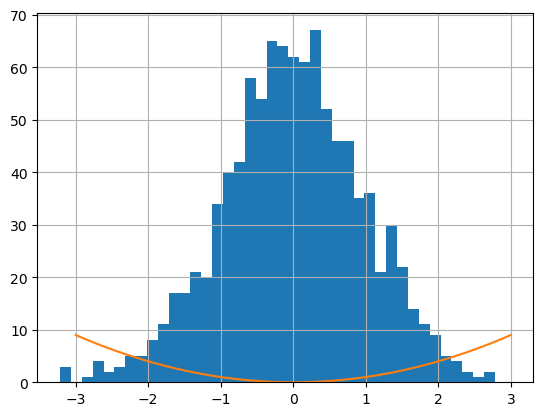

In [90]:
df = pd.DataFrame({"y" : np.random.randn(1000)})
ax = df["y"].hist(bins=40)
x = np.linspace(-3,3,100)
ax.plot(x, x**2)

# Feladatok

### 1. feladat
Olvasd be egy pandas DataFrame-be az `erettsegistat.csv` adatfájlt! Figyelj arra, hogy a `pd.read_csv()` fuggvenyben az `encoding='latin-1'` kulcsszavas argumentumot allitsd be a megfelelo karakterkodolas erdekeben!

Ez az adatfajlt az elmult par ev matematikaerettsegijeinek eredmenyeit tartalmazza kulonbozo mas adatokkal (pl. erettsegizo iskolatipusa, erettsegi szinte stb.) egyutt.

In [92]:
erettsegi=pd.read_csv('erettsegistat.csv',encoding='latin-1')

/tmp/ipykernel_13174/449538356.py:1: DtypeWarning: Columns (3,5,6,9,11,12,13,14,15,16,17,18,30) have mixed types. Specify dtype option on import or set low_memory=False.
  erettsegi=pd.read_csv('erettsegistat.csv',encoding='latin-1')


In [93]:
erettsegi.head()

,I. rész,II. rész,a 3 feladat összesen,alkalmazások,az elméleti kérdések összesen,definíció,feladat megoldása,intézmény megyéje,matematikai kommunikáció,"nyelvhasználat, kommunikáció",...,vizsgázó képzési munkarendje,vizsgázó képzési típusa,vizsgázó neme,vizsgázó részvétele,vizsgázó évfolyama,Év,érdemjegy,írásbeli pontszám,össz pontszám,össz százalék
0,12.0,29.0,-,NaN,-,NaN,NaN,Budapest,-,NaN,...,nappali,gimnázium,nõ,megjelent,12,2020,3,41.0,41.0,41.0
1,29.0,54.0,-,NaN,-,NaN,NaN,Budapest,-,NaN,...,nappali,gimnázium,nõ,megjelent,12,2020,5,83.0,83.0,83.0
2,28.0,43.0,-,NaN,-,NaN,NaN,Budapest,-,NaN,...,nappali,gimnázium,nõ,megjelent,12,2020,4,71.0,71.0,71.0
3,17.0,23.0,-,NaN,-,NaN,NaN,Budapest,-,NaN,...,nappali,gimnázium,nõ,megjelent,12,2020,3,40.0,40.0,40.0
4,14.0,14.0,-,NaN,-,NaN,NaN,Budapest,-,NaN,...,nappali,gimnázium,férfi,megjelent,12,2020,2,28.0,28.0,28.0


In [94]:
erettsegi.columns

Index(['I. rész', 'II. rész', 'a 3 feladat összesen', 'alkalmazások',
       'az elméleti kérdések összesen', 'definíció', 'feladat megoldása',
       'intézmény megyéje', 'matematikai kommunikáció',
       'nyelvhasználat, kommunikáció', 'szóbeli pontszám',
       'tartalmi összetétel, felépítés', 'témakifejtés: alkalmazások',
       'témakifejtés: definíció', 'témakifejtés: feladat megoldása',
       'témakifejtés: nyelvhasználat, kommunikáció',
       'témakifejtés: tartalmi összetétel, felépítés',
       'témakifejtés: tétel és bizonyítás', 'tétel és bizonyítás',
       'vizsga fajtája', 'vizsga nyelve', 'vizsga szintje', 'vizsgamentesség',
       'vizsgatárgy neve', 'vizsgázó képzési munkarendje',
       'vizsgázó képzési típusa', 'vizsgázó neme', 'vizsgázó részvétele',
       'vizsgázó évfolyama', 'Év', 'érdemjegy', 'írásbeli pontszám',
       'össz pontszám', 'össz százalék'],
      dtype='object')

### 2. feladat: Melyik szinten (kozep/emelt), melyik iskolatipusban hanyan erettsegiztek 2020-ban?

Oldd meg a feladatot `groupby`-jal es `pivot_table`-lel is.

In [101]:
erettsegi[erettsegi['Év']==2020].groupby(['vizsgázó képzési típusa','vizsga szintje'])[['össz százalék']].count()

össz százalék
vizsgázó képzési típusa                            vizsga szintje               
-                                                  emelt                     501
                                                   közép                     955
gimnázium                                          emelt                    3954
                                                   közép                   35665
szakgimnázium/szakközépiskola (2016.09.01-tõl k... emelt                     318
                                                   közép                   24794
szakközép                                          emelt                      28
                                                   közép                    2825

In [103]:
erettsegi.pivot_table(values="össz százalék",
               columns="vizsga szintje",
               index="vizsgázó képzési típusa",
               aggfunc='count')

vizsga szintje,emelt,közép
vizsgázó képzési típusa,,
-,1693,8066
gimnázium,15735,186072
szakgimnázium/szakközépiskola (2016.09.01-tõl kifutó rendszerben),762,100156
szakközép,331,42260


### 3. feladat: 
a) Szamold ki a emeltszintu irasbeli pontszamok atlagat es szorasat (legyenek $\mu$ és $\sigma$) 2020-ban. 

b) Abrazold a emeltszintu 2020-as irasbeli pontszamok eloszlasat hisztogramon!

c) Rakj ra az abrara egy normalis eloszlast az elobb kiszamolt atlaggal es szorassal. A következő függvényt kellene ábrázolni ehhez:
$$
    f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\mathrm{e}^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$
*Figyelj arra, hogy a hisztogram alatti terulet 1 legyen, kulonben nem lesz osszevetheto a ket gorbe. Keresd meg ehhez a `hist` fuggveny megfelelo kapcsolojat!*

In [110]:
erettsegi[(erettsegi['Év']==2020) & (erettsegi['vizsga szintje']=='emelt')]

,I. rész,II. rész,a 3 feladat összesen,alkalmazások,az elméleti kérdések összesen,definíció,feladat megoldása,intézmény megyéje,matematikai kommunikáció,"nyelvhasználat, kommunikáció",...,vizsgázó képzési munkarendje,vizsgázó képzési típusa,vizsgázó neme,vizsgázó részvétele,vizsgázó évfolyama,Év,érdemjegy,írásbeli pontszám,össz pontszám,össz százalék
64239,41.0,52.0,NaN,-,NaN,-,-,Budapest,NaN,-,...,nappali,gimnázium,nõ,megjelent,12,2020,5,93.0,93.0,80.0
64240,37.0,37.0,NaN,-,NaN,-,-,Budapest,NaN,-,...,nincs tanulói jogviszonya,-,nõ,megjelent,NaN,2020,5,74.0,74.0,64.0
64241,24.0,30.0,NaN,-,NaN,-,-,Budapest,NaN,-,...,nappali,gimnázium,férfi,megjelent,12,2020,3,54.0,54.0,46.0
64242,4.0,3.0,NaN,-,NaN,-,-,Budapest,NaN,-,...,nincs tanulói jogviszonya,-,férfi,megjelent,NaN,2020,1,7.0,7.0,6.0
64243,30.0,36.0,NaN,-,NaN,-,-,Budapest,NaN,-,...,nincs tanulói jogviszonya,-,férfi,megjelent,NaN,2020,4,66.0,66.0,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69035,47.0,36.0,NaN,-,NaN,-,-,Zala,NaN,-,...,nappali,gimnázium,férfi,megjelent,12,2020,5,83.0,83.0,72.0
69036,41.0,44.0,NaN,-,NaN,-,-,Zala,NaN,-,...,nappali,gimnázium,férfi,megjelent,12,2020,5,85.0,85.0,73.0
69037,31.0,38.0,NaN,-,NaN,-,-,Zala,NaN,-,...,nappali,gimnázium,nõ,megjelent,12,2020,5,69.0,69.0,60.0
69038,24.0,28.0,NaN,-,NaN,-,-,Zala,NaN,-,...,nappali,szakgimnázium/szakközépiskola (2016.09.01-tõl ...,férfi,megjelent,12,2020,3,52.0,52.0,45.0


"\nx = np.linspace(-3,3,100)\nmu=erettsegi[erettsegi['Év']==2020 & erettsegi['vizsga szintje']=='emelt']['írásbeli pontszám'].mean()\nsigma=\nax.plot(x, x**2)"

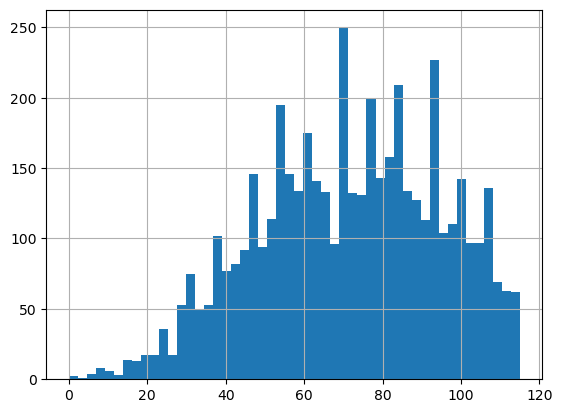

In [111]:
ax = erettsegi[(erettsegi['Év']==2020) & (erettsegi['vizsga szintje']=='emelt')]['írásbeli pontszám'].hist(bins=50)
'''
x = np.linspace(-3,3,100)
mu=erettsegi[erettsegi['Év']==2020 & erettsegi['vizsga szintje']=='emelt']['írásbeli pontszám'].mean()
sigma=
ax.plot(x, x**2)'''

### 4. feladat: Igaz-e az, hogy a ponthatároknál van kerekítés?

Ha igen, hol kerekítenek jobban felfele a ponthatároknál? Szakközépiskolákban vagy gimnáziumokban? Ábrázold mindkét típusú intézményben az `össz százalék`-ok eloszlását histogramon, $2\%$-os binekkel, egy ábrán. Nézd meg külön emelt szintre és közép szintre.

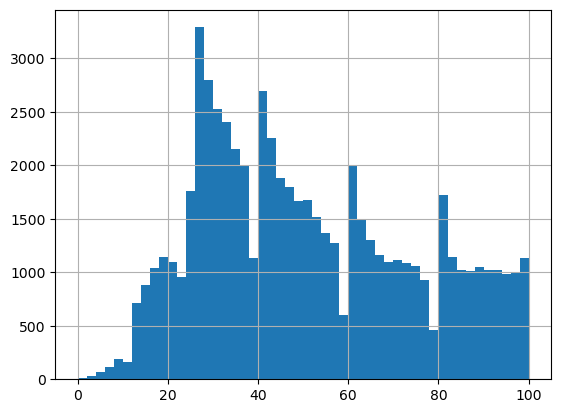

In [112]:
ax = erettsegi[(erettsegi['Év']==2020) & (erettsegi['vizsga szintje']=='közép')]['írásbeli pontszám'].hist(bins=50)


### 5. feladat:

Vizsgáld meg, hogy van-e különbség a lányok és fiúk eredményei között az adathalmaz alapján. Határozd meg a lányok és fiúk átlagos összpontszámát, és vizsgáld meg, hogy van-e szignifikáns különbség közöttük.

### 6. feladat:

Hogyan változtak az eredmények évről évre az adathalmazban. Határozd meg az évek szerinti átlagpontszámokat, és vizsgáld meg, hogy van-e tendencia az eredmények alakulásában.